# Books Read in 2017

## Prep
Imports and set variables

In [1]:
import pandas as pd
import numpy as np
import seaborn
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
YEAR = 2017
JAN1 = '1/1/{}'.format(YEAR)

## Get Data
Export bookshelves from Goodreads as a CSV file named books.csv and read it in.

In [3]:
books = pd.read_csv('books.csv')
books['Date Read'] = pd.to_datetime(books['Date Read'])

## Prep Data
Fix data issues specific to current year

In [4]:
# Behave has wrong Date Read date in Goodreads export.
books.at[books[books['Title'].str.startswith('Behave')].index.values[0], 'Date Read'] = '11/14/17'
# The Knowledge Illusion is missing Publication Year in Goodreads export.
books.at[books[books['Title'].str.startswith('The Knowledge Illusion')].index.values[0], 
         'Original Publication Year'] = 2017

Add Start Dates to books. The start date is in the Goodreads database, but it is not in the Export file. So, these dates need to be added manually. To simplify this, a start dict is created which can be copy/pasted as part of the next step. 

In [5]:
print('{',sep='')
for bk in books[(books['Date Read'] >= JAN1) | 
                (books['Exclusive Shelf'] == 
                 'currently-reading')]['Title'].values:
    print ('"{}":"1/1/00",'.format(bk))
print('}')

{
"The Upside of Irrationality: The Unexpected Benefits of Defying Logic at Work and at Home":"1/1/00",
"Behave: The Biology of Humans at Our Best and Worst":"1/1/00",
"The Cartel":"1/1/00",
"The Hearts of Men: A Novel":"1/1/00",
"Everybody Lies: Big Data, New Data, and What the Internet Can Tell Us About Who We Really Are":"1/1/00",
"Lincoln in the Bardo":"1/1/00",
"Artemis":"1/1/00",
"The Circle":"1/1/00",
"Never Let Me Go":"1/1/00",
"Free Will":"1/1/00",
"Stumbling on Happiness":"1/1/00",
"Homo Deus: A Brief History of Tomorrow":"1/1/00",
"The Knowledge Illusion: Why We Never Think Alone":"1/1/00",
"On Tyranny: Twenty Lessons from the Twentieth Century":"1/1/00",
"Naked Statistics: Stripping the Dread from the Data":"1/1/00",
"Being Mortal: Medicine and What Matters in the End":"1/1/00",
"Why Does the World Exist?: An Existential Detective Story":"1/1/00",
"How Not to Be Wrong: The Power of Mathematical Thinking":"1/1/00",
"Smarter Faster Better: The Secrets of Being Productive in L

Copy the above text and paste it below. Set it equal to start_dates. Replace the "1/1/00" with the correct start dates.

In [6]:
start_dates = {"The Upside of Irrationality: The Unexpected Benefits of Defying Logic at Work and at Home":"12/26/17",
                "Behave: The Biology of Humans at Our Best and Worst":"5/5/17",
                "The Cartel":"12/27/17",
                "The Hearts of Men: A Novel":"12/19/17",
                "Everybody Lies: Big Data, New Data, and What the Internet Can Tell Us About Who We Really Are":"12/9/17",
                "Lincoln in the Bardo":"11/18/17",
                "Artemis":"11/15/17",
                "The Circle":"9/2/17",
                "Never Let Me Go":"10/20/17",
                "Free Will":"9/2/17",
                "Stumbling on Happiness":"8/5/17",
                "Homo Deus: A Brief History of Tomorrow":"7/4/17",
                "The Knowledge Illusion: Why We Never Think Alone":"6/15/17",
                "On Tyranny: Twenty Lessons from the Twentieth Century":"6/17/17",
                "Naked Statistics: Stripping the Dread from the Data":"1/27/17",
                "Being Mortal: Medicine and What Matters in the End":"4/6/17",
                "Why Does the World Exist?: An Existential Detective Story":"3/18/17",
                "How Not to Be Wrong: The Power of Mathematical Thinking":"2/7/17",
                "Smarter Faster Better: The Secrets of Being Productive in Life and Business":"10/5/16",
                "Dark Territory: The Secret History of Cyber War":"1/26/17",
                "The Upright Thinkers: The Human Journey from Living in Trees to Understanding the Cosmos":"11/28/16",
                "Cure: A Journey into the Science of Mind Over Body":"1/4/17",
                "What If?: Serious Scientific Answers to Absurd Hypothetical Questions":"6/25/15",
                "Good to Great: Why Some Companies Make the Leap... and Others Don't":"10/5/15",
                "On Killing: The Psychological Cost of Learning to Kill in War and Society":"12/11/15",
                "Work Rules!: Insights from Inside Google That Will Transform How You Live and Lead":"9/3/15"}

Populate the Date Started column.

In [7]:
books['Date Started'] = books['Title'].map(start_dates)
books['Date Started'] = pd.to_datetime(books['Date Started'])

Remove unnecessary columns

In [8]:
for c in ('ISBN','ISBN13','Publisher','Binding', 'Book Id', 'My Review', 
          'Spoiler', 'Private Notes','Recommended For', 'Recommended By', 
          'Owned Copies', 'Original Purchase Date', 'Original Purchase Location', 
          'Condition', 'Condition Description', 'BCID'):
    try:
        del books[c]
    except:
        pass

## Filter Books
Downselect list of books that were either finished in current year or were started in current year and not finished. 

In [9]:
books = books[(books['Date Read'] >= JAN1)
              | ((books['Exclusive Shelf'] =='currently-reading')
                 & (books['Date Started'] >= JAN1))]

In [10]:
books['Finished'] = books['Date Read'].notnull()
# if book has not been finished, set Date Read to Dec 31. This is done for plotting purposes. 
books['Date Read'] = books['Date Read'].fillna(datetime.datetime(YEAR,12,31))

## List the Books

In [11]:
books_ = books[books['Finished'] == True].reset_index(drop=True)
books_['Original Publication Year'] = books_['Original Publication Year'].fillna(0)
books_.sort_values(by='Date Read',ascending=True,inplace=True)
for row in books_.iterrows():
    row = row[1]
    print ('%s by %s (%i)'%(row['Title'],row['Author'],row['Original Publication Year']))

The Upright Thinkers: The Human Journey from Living in Trees to Understanding the Cosmos by Leonard Mlodinow (2015)
Dark Territory: The Secret History of Cyber War by Fred Kaplan (2016)
Smarter Faster Better: The Secrets of Being Productive in Life and Business by Charles Duhigg (2016)
How Not to Be Wrong: The Power of Mathematical Thinking by Jordan Ellenberg (2014)
Why Does the World Exist?: An Existential Detective Story by Jim Holt (2011)
Naked Statistics: Stripping the Dread from the Data by Charles Wheelan (2012)
Being Mortal: Medicine and What Matters in the End by Atul Gawande (2014)
On Tyranny: Twenty Lessons from the Twentieth Century by Timothy Snyder (2017)
The Knowledge Illusion: Why We Never Think Alone by Steven Sloman (2017)
Homo Deus: A Brief History of Tomorrow by Yuval Noah Harari (2015)
Stumbling on Happiness by Daniel Todd Gilbert (2006)
Free Will by Sam Harris (2012)
Never Let Me Go by Kazuo Ishiguro (2005)
The Circle by Dave Eggers (2013)
Behave: The Biology of H

## Calculations
Calculate Time to Read

In [12]:
# Add a day to make it inclusive
books['Time to Read'] = (books['Date Read'] - books['Date Started']) + datetime.timedelta(days=1)
# if book has not been finished then set Time to Read to 0 days.
books['Time to Read'] = books['Time to Read'].where(books['Finished'] == True, datetime.timedelta(days=0))

Calculate Pages Read per Day

In [13]:
books['Pages per Day'] = books['Number of Pages'] / [x.days for x in books['Time to Read']]

Create a short title for some of the plots.

In [14]:
books['Title (short)'] = books['Title'].apply(lambda x: x.split(':')[0])

Sort books

In [15]:
books.sort_values(by='Date Started',ascending=True,inplace=True)

## Plotting

In [16]:
finished_color, unfinished_color = "#4C72B0","#CCB974"
mapper = {True:finished_color,False:unfinished_color}
s = books['Finished'].map(mapper)
s[books['Date Started'] < datetime.datetime(YEAR,1,1)] = "#55A868"
clist = list(s)

### Books Across the Year

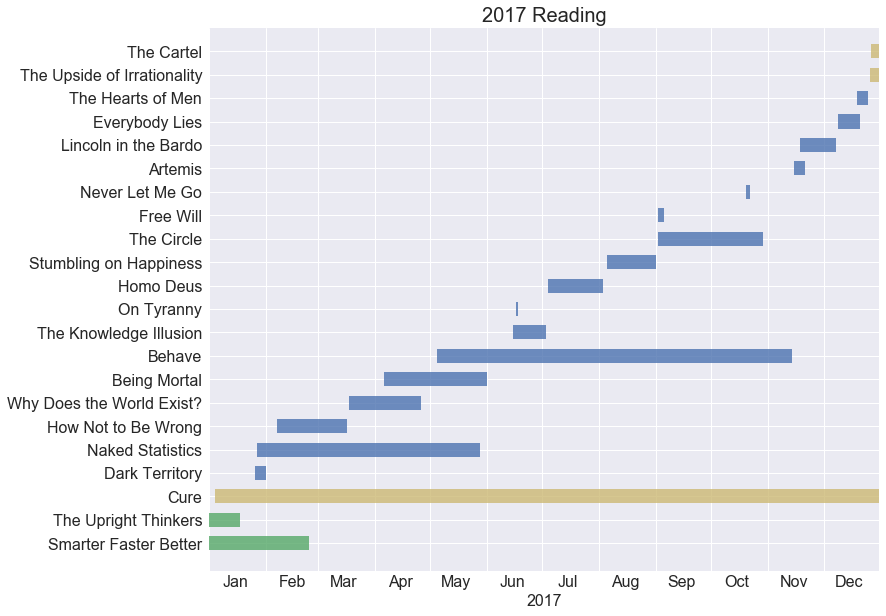

In [17]:
def _create_date(date):
    """Creates the date"""
    try:
        date = pd.to_datetime(date)
    except:
        pass
    if date < datetime.datetime(YEAR, 1, 1):
        date = datetime.datetime(YEAR, 1, 1)
    mdate = dates.date2num(date) 
    return mdate

ylabels = list(books['Title (short)'])
start_dates = list(books['Date Started'])
end_dates = list(books['Date Read'])

ilen = len(ylabels)
pos = np.arange(0.5,ilen*0.5+0.5,0.5)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
for i in range(ilen):
    start_date,end_date = _create_date(start_dates[i]), _create_date(end_dates[i])
    ax.barh((i*0.5)+0.5, end_date - start_date, label=ylabels[i], left=start_date, height=0.3, 
            align='center', alpha = 0.8, color=clist[i])
locsy, labelsy = plt.yticks(pos,ylabels)
plt.setp(labelsy, fontsize = 16)
ax.set_ylim(ymin = -0.1, ymax = ilen*0.5+0.5)

ax.xaxis_date()
ax.set_xlim(xmin=_create_date(datetime.datetime(YEAR, 1, 1)),
           xmax=_create_date(datetime.datetime(YEAR, 12, 31)))
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_minor_locator(dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))

plt.title('{} Reading'.format(YEAR), fontsize=20)
plt.xlabel(YEAR, fontsize=16)

for tick in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(16) 

### Book Ratings

Average Personal Goodread Rating: 3.736842105263158
Average Site Goodread Rating: 3.947894736842105


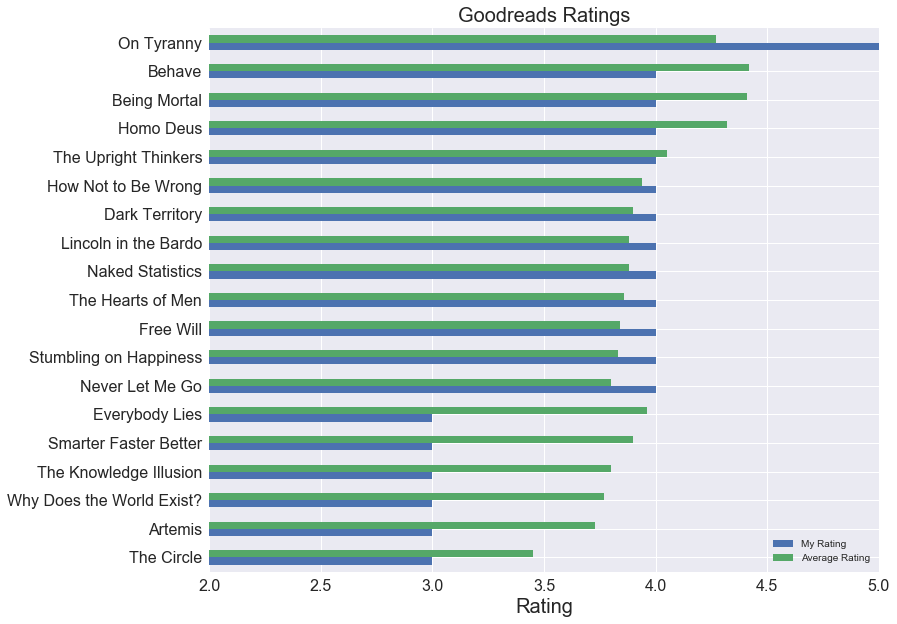

In [18]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)',drop=True).sort_values(by=['My Rating','Average Rating'],ascending=True)
ax = books_[['My Rating','Average Rating']].plot(kind='barh',xlim=(2,5),figsize=(12,10),fontsize=16)
ax.yaxis.label.set_visible(False)
plt.xlabel('Rating', fontsize=20)
plt.title('Goodreads Ratings', fontsize=20);
print ('Average Personal Goodread Rating:',books_['My Rating'].mean())
print ('Average Site Goodread Rating:',books_['Average Rating'].mean())

### Number of Pages

Total Number of Pages: 6663.0


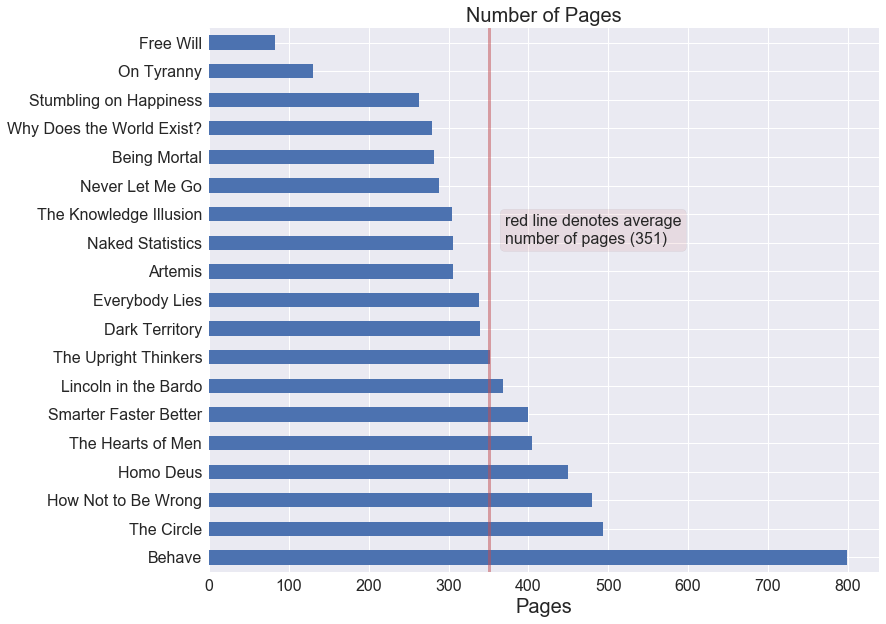

In [19]:
books_ = books[books['Finished'] == True]
avg = books_['Number of Pages'].mean()
books_ = books_.set_index('Title (short)')
ax = books_['Number of Pages'].sort_values(ascending=False).plot(kind='barh',
                                                            title='Number of Pages',figsize=(12,10),fontsize=16)
ax.yaxis.label.set_visible(False)

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+20, 12, 'red line denotes average\nnumber of pages ({:.0f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
plt.xlabel('Pages', fontsize=20)
plt.title('Number of Pages', fontsize=20)
print ('Total Number of Pages:',books_['Number of Pages'].sum())

/Users/lukestarnes/anaconda/envs/Py3.6Jupe/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lukestarnes/anaconda/envs/Py3.6Jupe/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


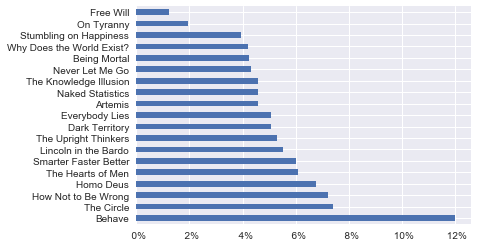

In [20]:
books_ = books[books['Finished'] == True]

books_.at[:,'Percent'] = books_['Number of Pages']/books_['Number of Pages'].sum()
books_ = books_.set_index('Title (short)')
ax = books_['Percent'].sort_values(ascending=False).plot(kind='barh')
ax.yaxis.label.set_visible(False)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals]);

Average Number of Pages over Year: 18.254794520547946


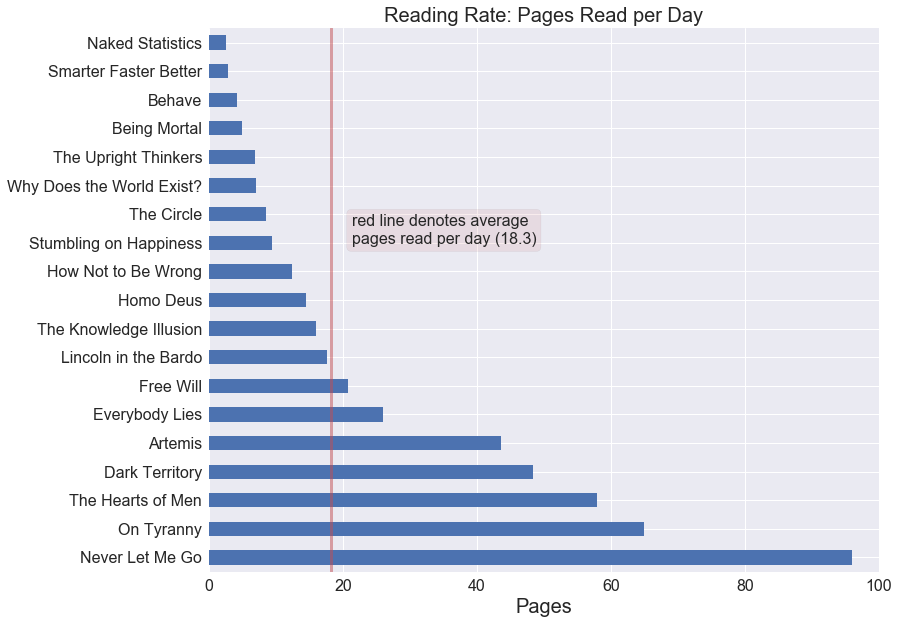

In [21]:
books_ = books[books['Finished'] == True]
books_ = books_.set_index('Title (short)')
avg = books_['Number of Pages'].sum()/365
ax = books_['Pages per Day'].sort_values(ascending=False).plot(kind='barh',
                                                               xlim=(0,100),figsize=(12,10),fontsize=16)
ax.yaxis.label.set_visible(False)
plt.title('Reading Rate: Pages Read per Day', fontsize=20)
# BELOW code used if one is "off the charts" and the x scale needs to be set such that one is too long
# mpd = books_.loc[XXX,'Pages per Day']
# mpd = str(mpd)+'->'
# ax.text(90,0.2,mpd,color='white',fontdict={'size':8,'weight':'bold'},
#         verticalalignment='top',horizontalalignment='left')

plt.axvline(x=avg,linewidth=3, color="#C44E52",alpha=0.5)
props = dict(boxstyle='round', facecolor="#C44E52", alpha=0.1)
ax.text(avg+3, 12, 'red line denotes average\npages read per day ({:.1f})'.format(avg),
        verticalalignment='top',horizontalalignment='left', bbox=props, fontsize=16)
plt.xlabel('Pages', fontsize=20)
print ('Average Number of Pages over Year:',avg)

### Publication Dates

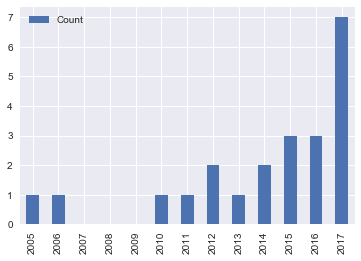

In [22]:
books_ = books.copy()
books_['T'] = books_.index
books_.reset_index(drop=True,inplace=True)
books_ = books_[['Original Publication Year','T']]
books_['Original Publication Year'] = books_['Original Publication Year'].astype(int)

years = list(range(books_['Original Publication Year'].min(), 
                   books_['Original Publication Year'].max()+1))
occurs = books_['Original Publication Year'].value_counts()
occurs_ = pd.DataFrame(index=years, columns=['Count'])
occurs_['Count'] = occurs
occurs = occurs_.fillna(0) 
ax = occurs.plot(kind='bar')

## Some Stats
Average Number of Pages per Day over Year

In [23]:
# prorate carry-over books
books_ = books[books['Finished'] == True]
carry_overs = books_[books_['Date Started'] < JAN1]
new_start = datetime.datetime(YEAR,1,1)

carry_overs.loc[:,'Number of Pages'] = (carry_overs['Number of Pages'] * 
                                        (((carry_overs['Date Read'] - 
                                           new_start).map(lambda x: x.days) +1) / 
                                         ((carry_overs['Date Read'] - 
                                           carry_overs['Date Started']).map(lambda x: x.days)+1))).values
books_['Number of Pages'].update(carry_overs['Number of Pages'])
print ('Average Number of Pages per Day over Year:',books_['Number of Pages'].sum()/365)

Average Number of Pages per Day over Year: 16.949841938883033


/Users/lukestarnes/anaconda/envs/Py3.6Jupe/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/lukestarnes/anaconda/envs/Py3.6Jupe/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
